In [31]:
with open('data/cat', encoding='UTF-8') as fp:
    text = fp.read()

In [32]:
from konlpy.tag import Okt
okt = Okt()

In [33]:
tokens = okt.nouns(text) #명사 뺴온다

In [34]:
import re

new_tokens =[]
for token in tokens:
    cat = re.sub('[a-zA-Z0-9]','',token) #\w
    if cat:
        new_tokens.append(cat)

In [35]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

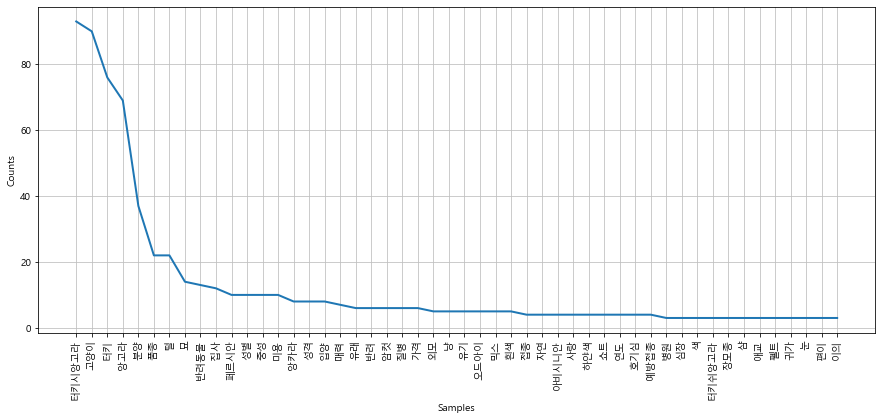

In [41]:
cat_text = nltk.Text(new_tokens, name='터키시안앙고라')
plt.figure(figsize=(15,6))
cat_text.plot(50)
plt.show()

In [40]:
stop_text="""
시 아이 오늘 살 완료 것 집 개월 나이 우리 특징 대해 중 때 판매 친구 이름 주정 마리 정도 개 저
를 글 위 때문 헤어 그 제 요 이 수 추정 개인 분 종 장모 사진 조금 가정 저희 터 무료 종이 지금 더 가지 
보호 진행 구조 현재 하루 발생 사람 테스트 처음 네이버 거래 결제 수도 포스팅 생각 요즘 비 못 지역 말
위해 남아 저녁 아파트 직접 빵 옹 전 유형 경우 쉬 시작 관심 알 해 정보 책임 한번 결과 사창 경기도 대한 사항 무 마취 홍 사전
편 아주 의 뱅 걸 모습 월요일 경남 진주시 하대동 한보 방면 발견 감쪽 안색 주인 다른 남자 힐
"""
stop_words = stop_text.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['종은', '터키시앙고라', '혼', '어제', '병원', '종묘', '남표', '만', '허락', '막둥이']

In [42]:
from wordcloud import WordCloud
from PIL import Image

In [44]:
data = cat_text.vocab().most_common(100)

In [47]:
mask = np.array(Image.open('data/cat.png'))
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)
wc = WordCloud(background_color= 'white',mask=mask, min_font_size=1,max_font_size=150,
                        max_words= 100,
                        relative_scaling= 0.3,
                        font_path= 'data/NanumGothic.ttf'
                        ).generate_from_frequencies(dict(data))




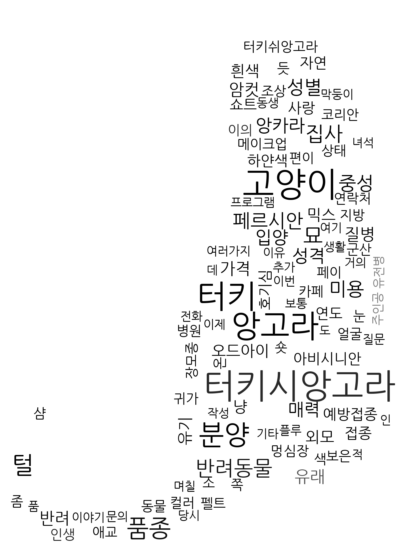

In [49]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()